In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.datasets import mnist

import numpy as np 
import copy

import matplotlib.pyplot as plt


In [4]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [5]:
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

print(X_train.shape)
print(X_test.shape)


(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [8]:

def create_model(input_shape, activation="relu"):

    input_img = Input(shape=input_shape)

    x = Conv2D(16, kernel_size = (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D(pool_size = (2, 2), padding='same')(x)

    # Conv2 #
    x = Conv2D(8, kernel_size = (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D(pool_size = (2, 2), padding='same')(x) 

    # Conv 3 #
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    encoded = MaxPooling2D(pool_size = (2, 2), padding='same')(x)

    # DeConv 1
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
    x = UpSampling2D((2, 2))(x) 

    # DeConv2
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)

    # Deconv3
    x = Conv2D(16, (3, 3), activation='relu')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)


    model = Model(input_img, decoded)
    model.summary()
    return model



In [9]:
input_shape = (28, 28, 1)
model = create_model(input_shape)
model.compile(optimizer="adam", loss="binary_crossentropy")

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 8)           0   

In [39]:
preds = model.predict(X_train[:2])

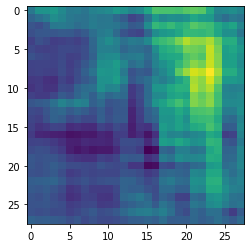

In [40]:
plt.imshow(preds[0])

In [41]:
model.fit(X_train, X_train, epochs=10, batch_size=32)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 150us/sample - loss: 0.1525
Epoch 2/10
60000/60000 [==============================] - 9s 143us/sample - loss: 0.1117
Epoch 3/10
60000/60000 [==============================] - 9s 156us/sample - loss: 0.1047
Epoch 4/10
60000/60000 [==============================] - 8s 137us/sample - loss: 0.1014
Epoch 5/10
60000/60000 [==============================] - 8s 140us/sample - loss: 0.0994
Epoch 6/10
60000/60000 [==============================] - 8s 130us/sample - loss: 0.0980
Epoch 7/10
47424/60000 [======================>.......] - ETA: 1s - loss: 0.0971

KeyboardInterrupt: 